Took Part:
Yael Muchtar 208606079
Tom Ashkury 205702608

In [1]:
# for inline plots in jupyter
%matplotlib inline

In [2]:
#import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

read the data from csv file to df

In [4]:
df = pd.read_csv("./marketing_campaigns_train.csv", index_col=0)

here we split split the data into the target value and everything else

In [5]:
target = pd.DataFrame(df['subscribed']) 
data = df.drop('subscribed', axis=1)

split the data into numeric and nominal data

In [6]:
num_col = data.describe().columns # to get the numeric column
num_data = data[num_col]
nom_data = data.drop(num_col, axis=1)
num_data.describe()

,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
count,30517.000000,30517.000000,30517.000000,30517.000000,30517.00000,30517.000000
mean,40.873546,1228.707966,2.769604,233.294262,0.58397,40.320706
std,10.591058,2738.410757,3.085730,232.690931,2.48213,100.489272
min,18.000000,-7207.000000,1.000000,2.000000,0.00000,-1.000000
25%,33.000000,74.000000,1.000000,95.000000,0.00000,-1.000000
50%,39.000000,411.000000,2.000000,164.000000,0.00000,-1.000000
75%,48.000000,1278.000000,3.000000,286.000000,0.00000,-1.000000
max,95.000000,91924.000000,63.000000,4428.000000,275.00000,871.000000


a sneakpeek into the dataframe to get a notion for the data we are dealing with

In [7]:
df.head(10)

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
id,,,,,,,,,,,,,,,,,,,,
512491,married,32,unknown,doctoral,student,cellular,300,False,True,False,True,phone call,False,2,4-Feb,175,failure,1,272,False
495633,married,45,1,master,scientist,cellular,1339,False,True,False,True,phone call,False,1,8-Jul,322,unknown,0,-1,False
516063,divorced,95,unknown,bachelor,accountant,telephone,2064,False,False,False,True,phone call,True,17,21-Apr,188,unknown,0,-1,True
491165,married,30,unknown,master,engineer,unknown,530,True,True,False,True,phone call,False,1,4-Jun,45,unknown,0,-1,False
494627,married,40,unknown,doctoral,manager,unknown,-922,True,True,True,False,phone call,False,2,23-Jun,39,unknown,0,-1,False
489162,married,39,unknown,unknown,engineer,unknown,584,True,True,False,True,phone call,False,2,28-May,77,unknown,0,-1,False
499714,married,50,unknown,master,technician,cellular,501,False,False,False,True,phone call,False,6,28-Jul,76,unknown,0,-1,False
490287,married,31,unknown,master,engineer,unknown,1390,False,True,False,True,phone call,False,4,30-May,28,unknown,0,-1,False
491006,married,45,2,master,teacher,unknown,3284,True,True,False,True,phone call,False,7,3-Jun,284,unknown,0,-1,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30517 entries, 512491 to 516748
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           30517 non-null  object
 1   age              30517 non-null  int64 
 2   n_child          30517 non-null  object
 3   education        30517 non-null  object
 4   profession       30517 non-null  object
 5   device           30517 non-null  object
 6   account_balance  30517 non-null  int64 
 7   loan             30517 non-null  bool  
 8   mortgage         30517 non-null  bool  
 9   credit           30517 non-null  bool  
 10  positive         30517 non-null  bool  
 11  campaign_type    30517 non-null  object
 12  consent          30517 non-null  bool  
 13  n_contact        30517 non-null  int64 
 14  l_date           30517 non-null  object
 15  l_call_duration  30517 non-null  int64 
 16  p_outcome        30517 non-null  object
 17  n_p_contact      30517 no

we check to see if their are any missing values from the data(we will need to consider this in our further analysis!)

In [9]:
df[(df=='unknown').sum(axis=1)>1]
df[(df=='unknown')].count()

status                 0
age                    0
n_child            19820
education           1244
profession           193
device              8871
account_balance        0
loan                   0
mortgage               0
credit                 0
positive               0
campaign_type          0
consent                0
n_contact              0
l_date                 0
l_call_duration        0
p_outcome          24943
n_p_contact            0
p_days                 0
subscribed             0
dtype: int64

In [10]:
df['Month'] = df['l_date'].str.extract('(\-[A-Za-z]+)', expand=False)
df['Month'] = df['Month'].str.replace('-', '')
#the conversion of num of childern into usable data
df['n_child2'] = df['n_child']
df['n_child2'] = df["n_child2"].str.replace("unknown", '')
df['n_child2'] = df["n_child2"].str.replace("3 or more", '3')
df['n_child2'] = pd.to_numeric(df['n_child2'])

# Statistics

in this section we will analyze the data using statistical methods learned in the class

as you can see directly below a couple of interesting points:
1.all the data in the campain_type column is the same
2.about 2/3 of the values in the n_child column is 'unknown'
3.about 5/6 of the values in the p_outcome column is 'unknown'

In [11]:
describe_df = nom_data.describe()
describe_df

,status,n_child,education,profession,device,loan,mortgage,credit,positive,campaign_type,consent,l_date,p_outcome
count,30517,30517,30517,30517,30517,30517,30517,30517,30517,30517,30517,30517,30517
unique,3,5,4,12,3,2,2,2,2,1,2,308,4
top,married,unknown,master,engineer,cellular,False,True,False,True,phone call,False,15-May,unknown
freq,18414,19820,15622,6538,19718,25632,17055,29987,28059,30517,26997,782,24943


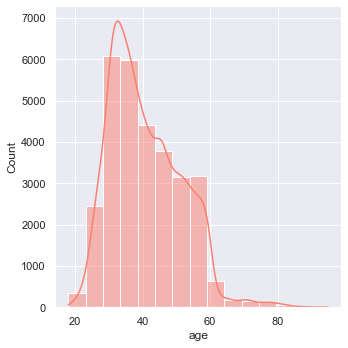

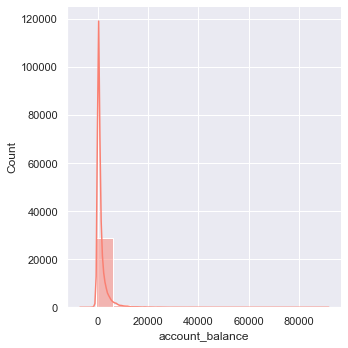

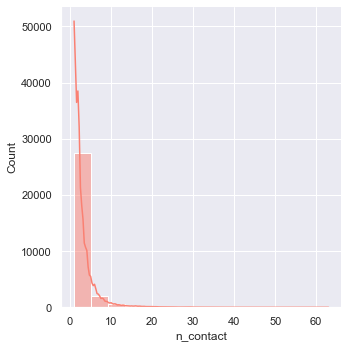

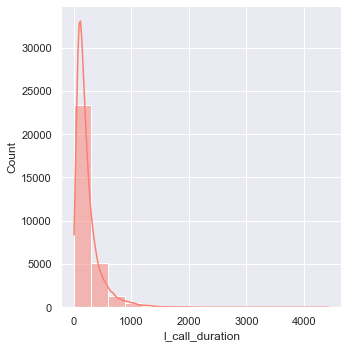

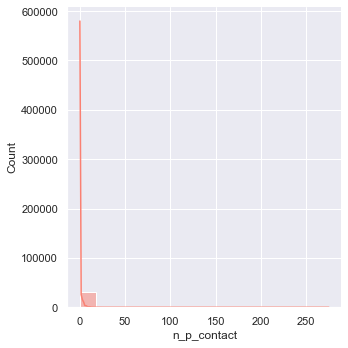

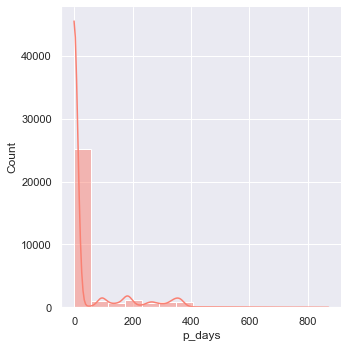

In [12]:
for col in num_col:
    sns.displot(num_data[col], bins=15, kde=True, color='salmon')

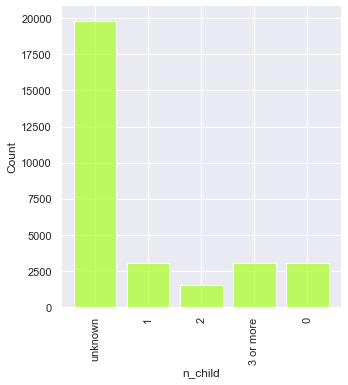

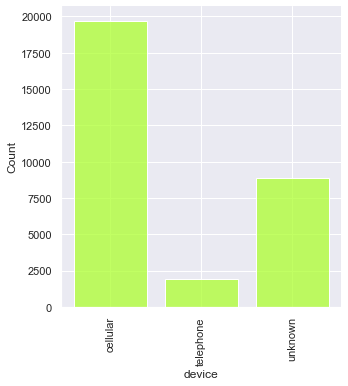

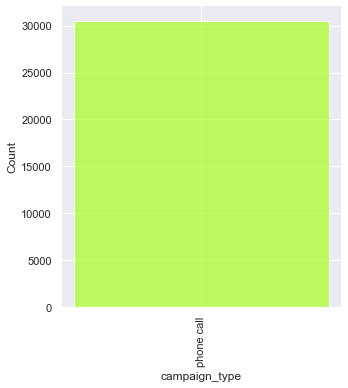

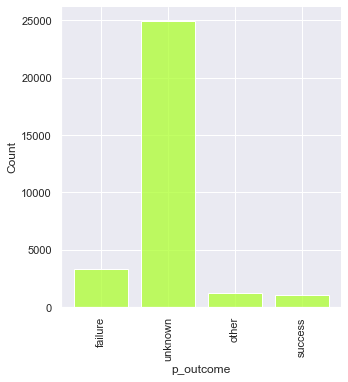

In [13]:
dist_col = ['n_child', 'device','campaign_type','p_outcome']
for col in dist_col:
    sns.displot(nom_data, x=col, shrink=.8, color='greenyellow').set_xticklabels(rotation=90)

splitting the data according to the target column

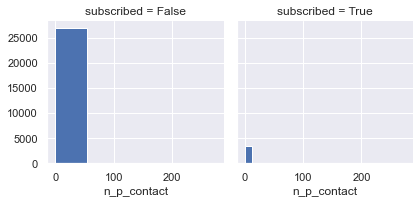

In [14]:
g = sns.FacetGrid(df, col='subscribed')
g.map(plt.hist, 'n_p_contact', bins=5);

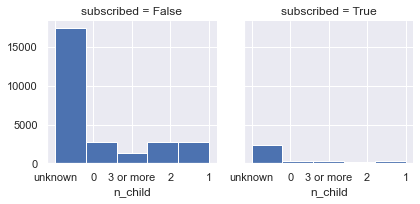

In [15]:
g = sns.FacetGrid(df, col='subscribed')
g.map(plt.hist, 'n_child', bins=5);

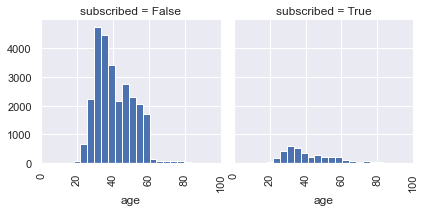

In [16]:
g = sns.FacetGrid(df, col='subscribed')
g.map(plt.hist, 'age', bins=20).set_xticklabels(rotation=90);

<AxesSubplot:xlabel='p_outcome', ylabel='l_call_duration'>

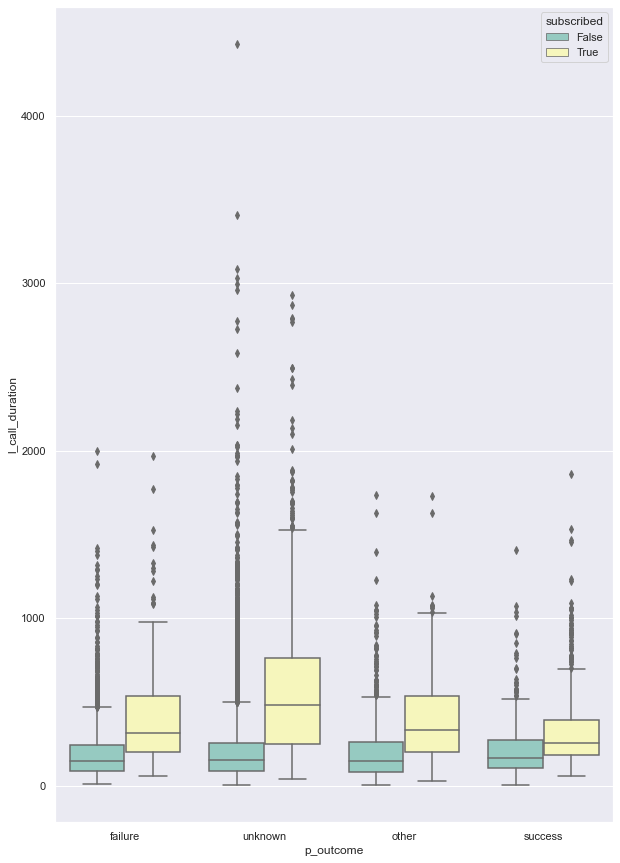

In [17]:
sns.set(rc={'figure.figsize':(10,15)})
sns.boxplot(y="l_call_duration", x="p_outcome", hue= "subscribed", data=df, palette="Set3")

as we can see from the boxplot it seems that people who didnt recive a call in the last campaigns('unknown') and in this campaign, the call duration is higher in avg from other groups(failure,success,other).

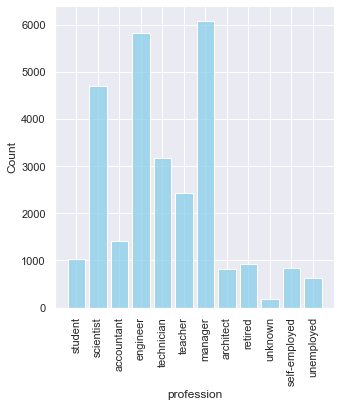

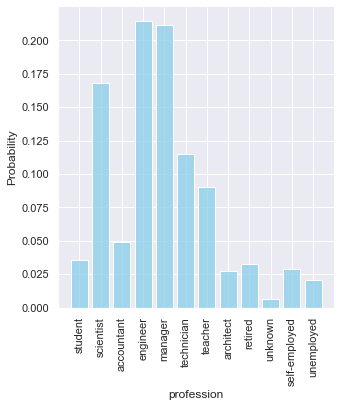

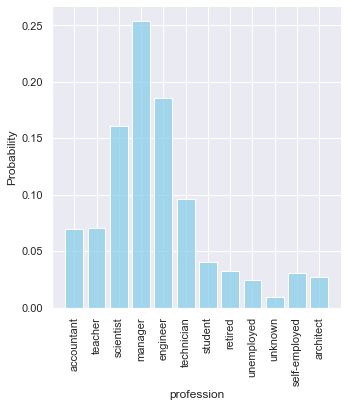

In [18]:
sns.displot(df[df['positive']==True], x='profession', shrink=.8, color='skyblue').set_xticklabels(rotation=90)
sns.displot(df, x='profession', shrink=.8, color='skyblue',stat= 'probability').set_xticklabels(rotation=90)
sns.displot(df[df['account_balance']>=1400], x='profession', shrink=.8, color='skyblue',stat= 'probability').set_xticklabels(rotation=90)

In [19]:
isnot_child_unknown = df['n_child'] != 'unknown'
df_child = df[isnot_child_unknown]
df_child['n_child'].value_counts(normalize=True)

1            0.285875
3 or more    0.284940
0            0.284098
2            0.145087
Name: n_child, dtype: float64

as we can see each row has pretty much the same probability to have any number of kids so we can discard this column unless it could help correlate diffrent columns or help meassure distances.

<AxesSubplot:>

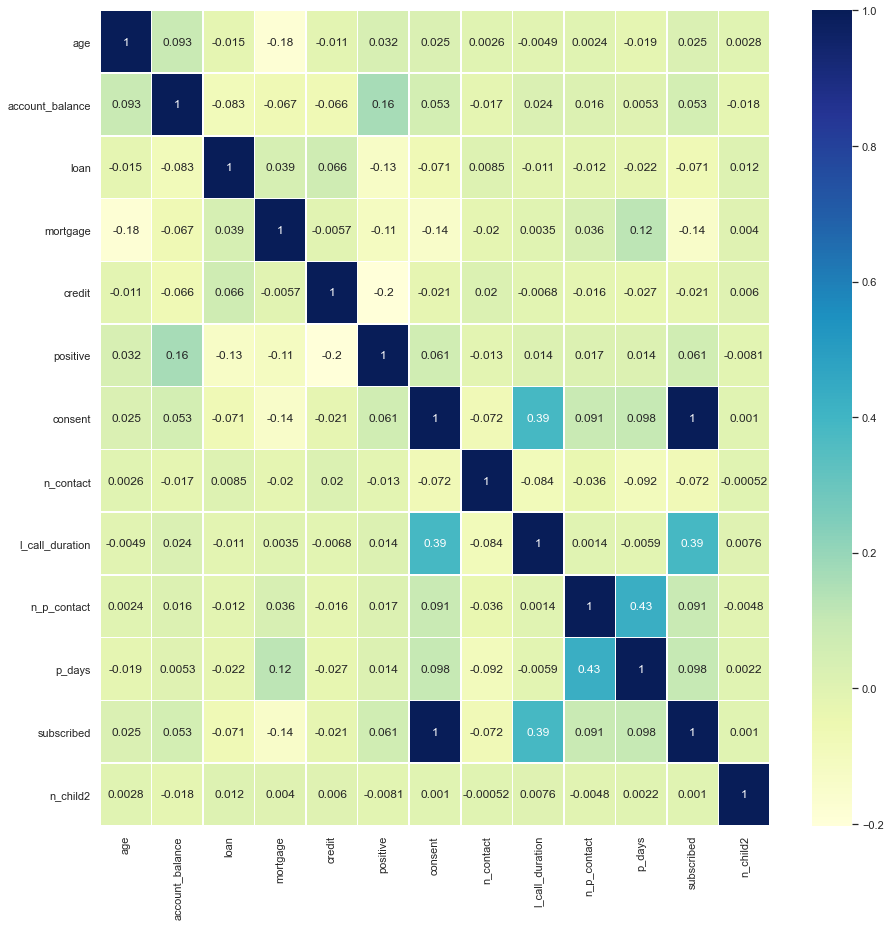

In [20]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

In [21]:
df

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,...,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed,Month,n_child2
id,,,,,,,,,,,,,,,,,,,,,
512491,married,32,unknown,doctoral,student,cellular,300,False,True,False,...,False,2,4-Feb,175,failure,1,272,False,Feb,NaN
495633,married,45,1,master,scientist,cellular,1339,False,True,False,...,False,1,8-Jul,322,unknown,0,-1,False,Jul,1.0
516063,divorced,95,unknown,bachelor,accountant,telephone,2064,False,False,False,...,True,17,21-Apr,188,unknown,0,-1,True,Apr,NaN
491165,married,30,unknown,master,engineer,unknown,530,True,True,False,...,False,1,4-Jun,45,unknown,0,-1,False,Jun,NaN
494627,married,40,unknown,doctoral,manager,unknown,-922,True,True,True,...,False,2,23-Jun,39,unknown,0,-1,False,Jun,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503479,married,60,unknown,doctoral,manager,cellular,693,False,False,False,...,False,2,14-Aug,124,unknown,0,-1,False,Aug,NaN
510801,single,43,unknown,unknown,technician,cellular,437,False,False,False,...,False,1,29-Jan,516,unknown,0,-1,False,Jan,NaN
495601,single,34,unknown,master,scientist,cellular,8,True,False,True,...,False,1,8-Jul,257,unknown,0,-1,False,Jul,NaN


In [22]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df.sort_values(by='Month',ascending=True,inplace=True) 
df['Month'].value_counts()

May    9416
Jul    4663
Aug    4224
Jun    3554
Nov    2627
Apr    1962
Feb    1803
Jan     918
Oct     506
Sep     388
Mar     320
Dec     136
Name: Month, dtype: int64

<Figure size 1080x432 with 0 Axes>

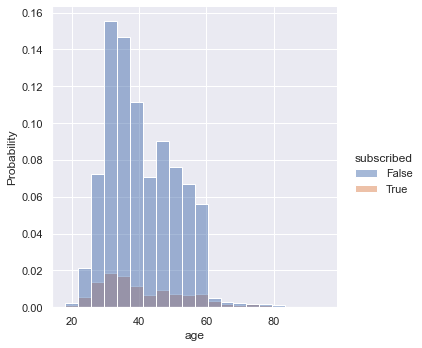

<Figure size 1080x432 with 0 Axes>

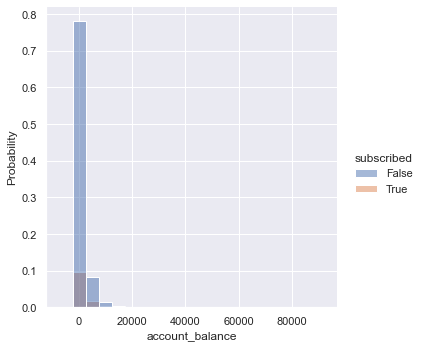

<Figure size 1080x432 with 0 Axes>

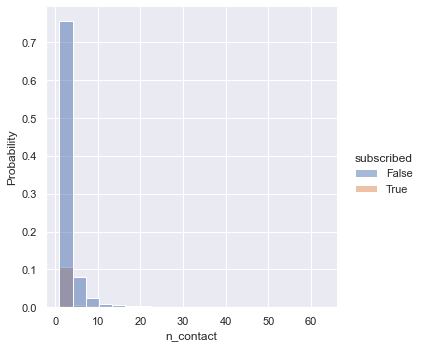

<Figure size 1080x432 with 0 Axes>

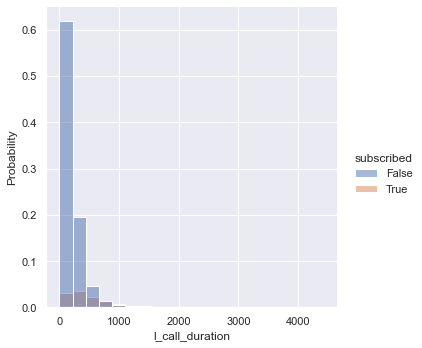

<Figure size 1080x432 with 0 Axes>

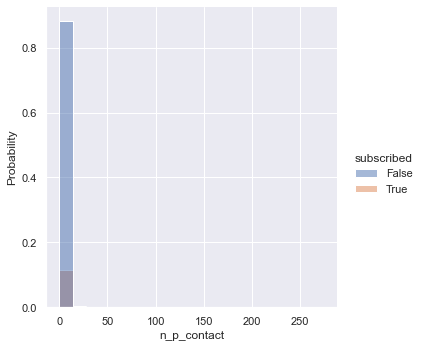

<Figure size 1080x432 with 0 Axes>

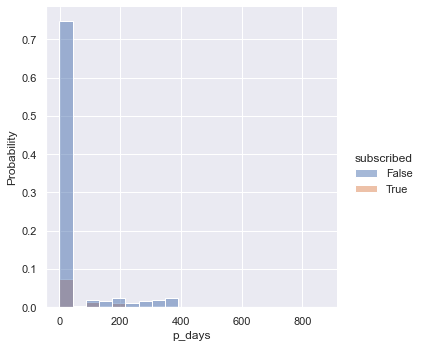

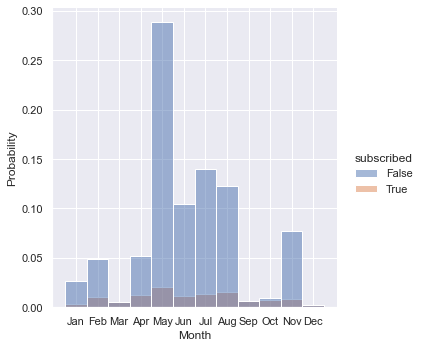

In [23]:
for col in num_data:
    #g = sns.FacetGrid(df, col='subscribed')
    plt.figure(figsize=(15, 6))
    sns.displot(df, x=col ,stat= 'probability' , hue='subscribed', bins=20)
    #plt.figure(figsize=(15, 6))
    #sns.displot(df[df['subscribed']==False], x=col,stat= 'probability' , hue='subscribed', bins=20, color = 'green')
sns.displot(df, x = 'Month' ,stat= 'probability' , hue='subscribed', bins=20)

In [24]:
pd.crosstab(df['Month'], df['subscribed']).sort_values(by = [True, False], ascending=True)

subscribed,False,True
Month,,
Dec,70,66
Jan,823,95
Mar,154,166
Sep,203,185
Oct,296,210
Nov,2365,262
Feb,1495,308
Jun,3201,353
Apr,1585,377


<ipython-input-25-34c9a2d62050>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5, 5))
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting i

<Figure size 360x360 with 0 Axes>

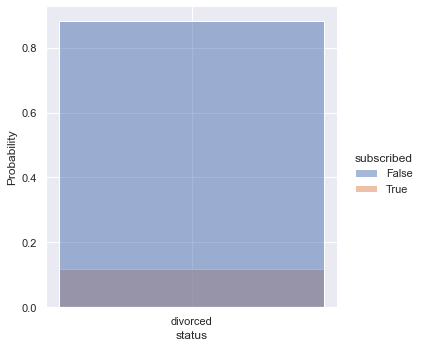

<Figure size 360x360 with 0 Axes>

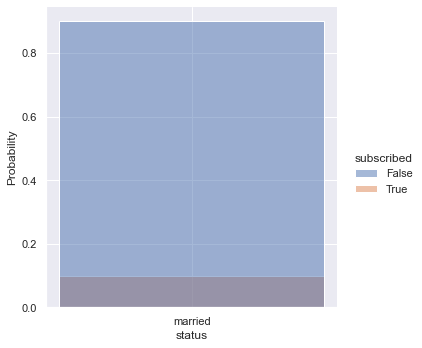

<Figure size 360x360 with 0 Axes>

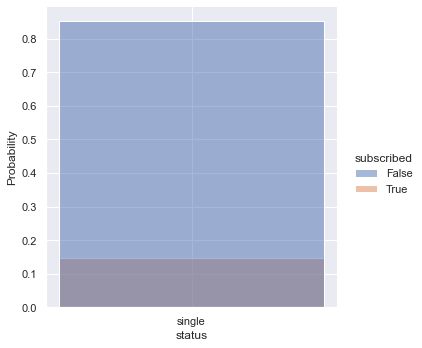

<Figure size 360x360 with 0 Axes>

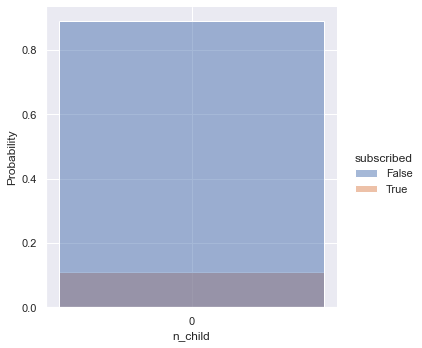

<Figure size 360x360 with 0 Axes>

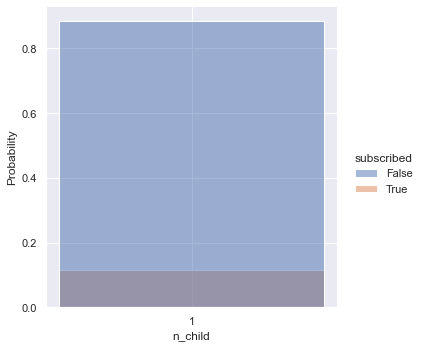

<Figure size 360x360 with 0 Axes>

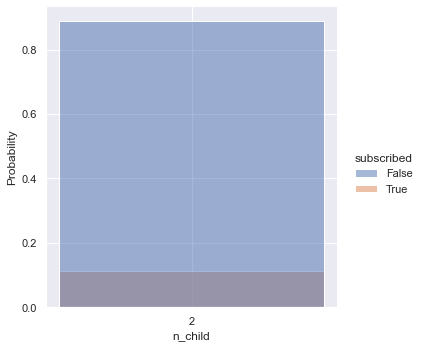

<Figure size 360x360 with 0 Axes>

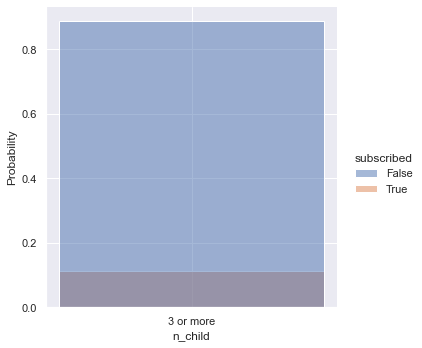

<Figure size 360x360 with 0 Axes>

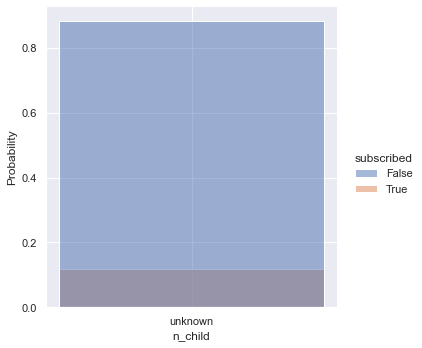

<Figure size 360x360 with 0 Axes>

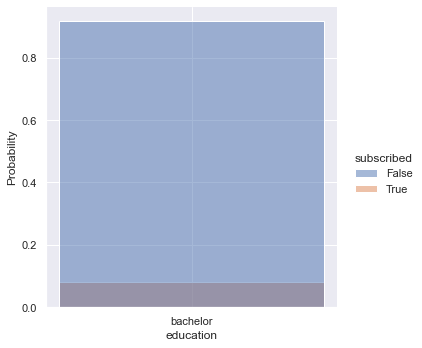

<Figure size 360x360 with 0 Axes>

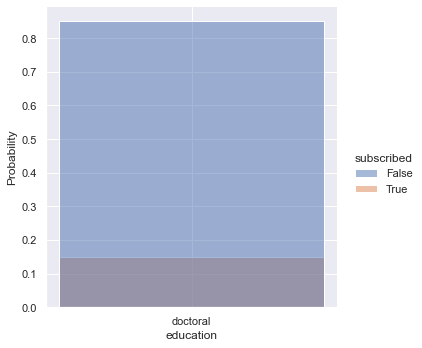

<Figure size 360x360 with 0 Axes>

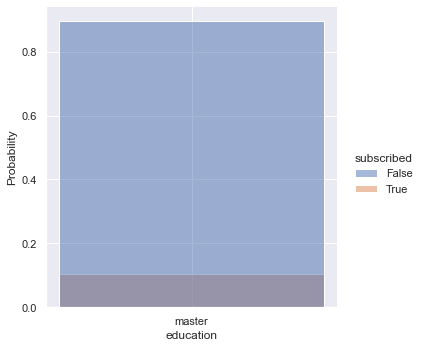

<Figure size 360x360 with 0 Axes>

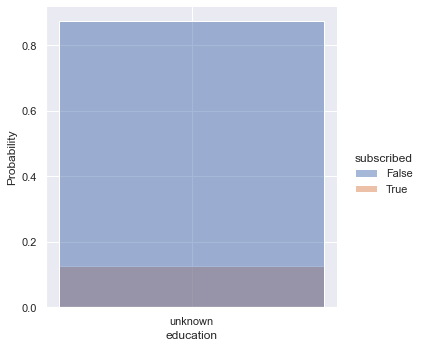

<Figure size 360x360 with 0 Axes>

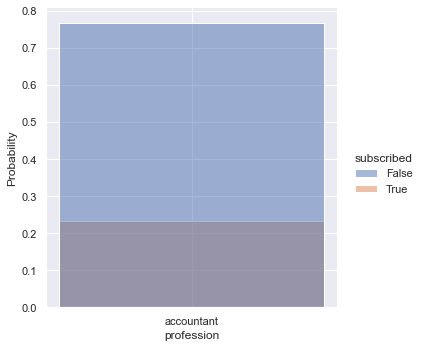

<Figure size 360x360 with 0 Axes>

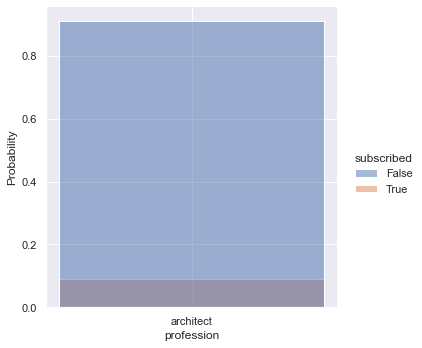

<Figure size 360x360 with 0 Axes>

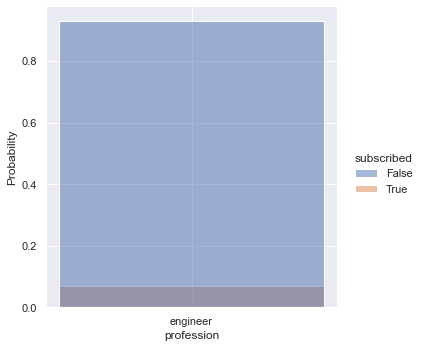

<Figure size 360x360 with 0 Axes>

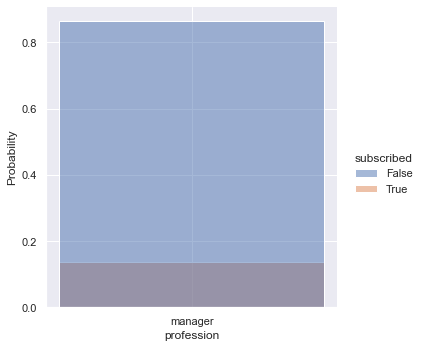

<Figure size 360x360 with 0 Axes>

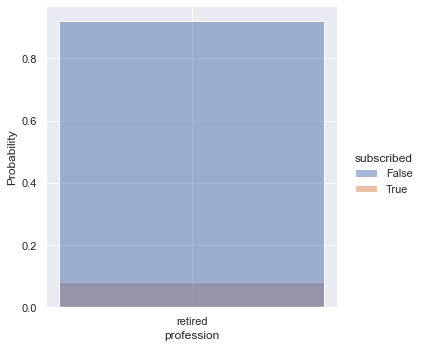

<Figure size 360x360 with 0 Axes>

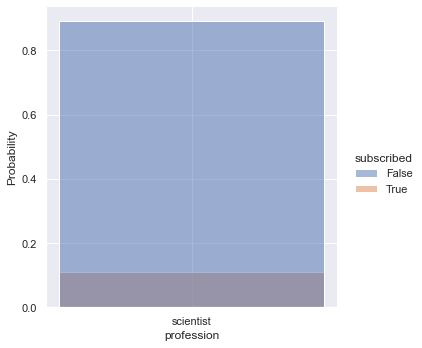

<Figure size 360x360 with 0 Axes>

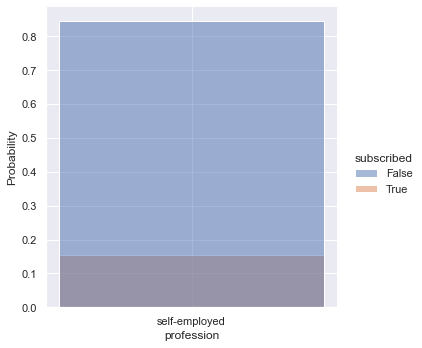

<Figure size 360x360 with 0 Axes>

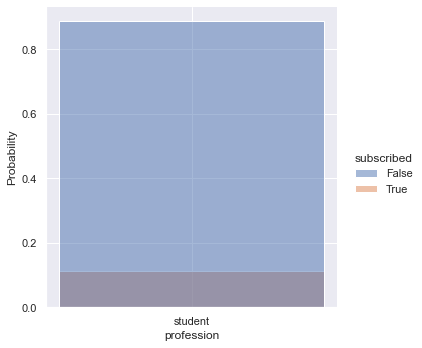

<Figure size 360x360 with 0 Axes>

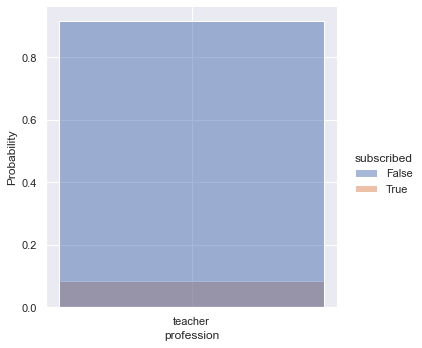

<Figure size 360x360 with 0 Axes>

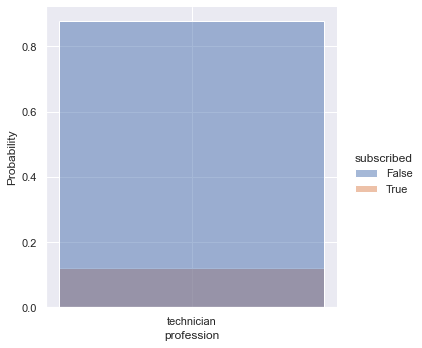

<Figure size 360x360 with 0 Axes>

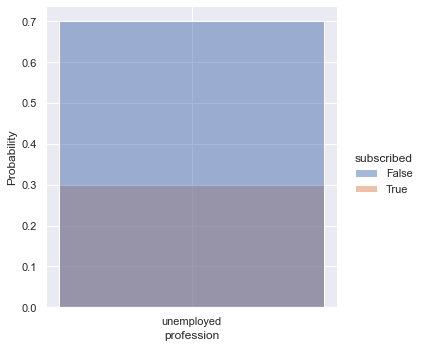

<Figure size 360x360 with 0 Axes>

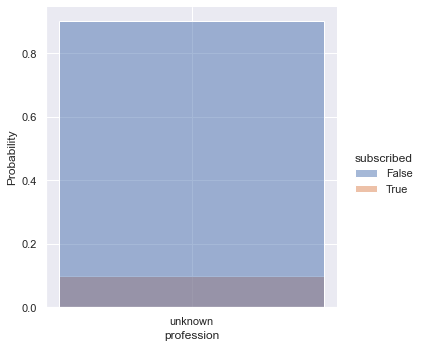

<Figure size 360x360 with 0 Axes>

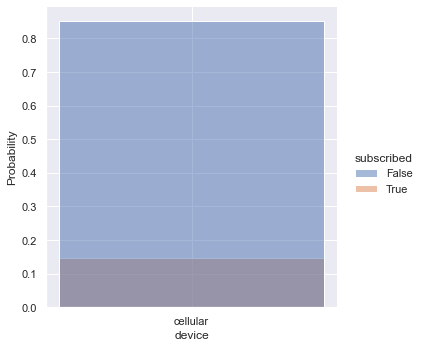

<Figure size 360x360 with 0 Axes>

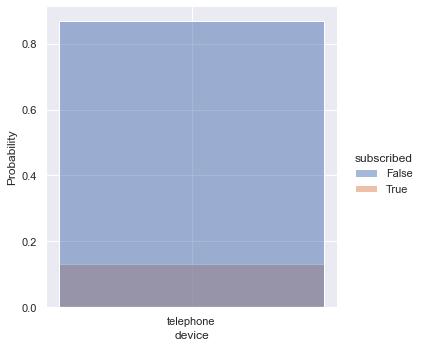

<Figure size 360x360 with 0 Axes>

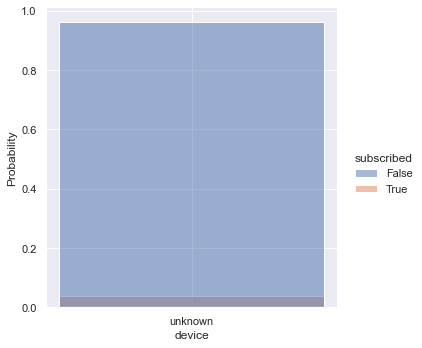

<Figure size 360x360 with 0 Axes>

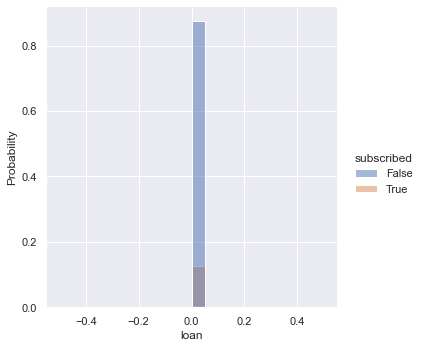

<Figure size 360x360 with 0 Axes>

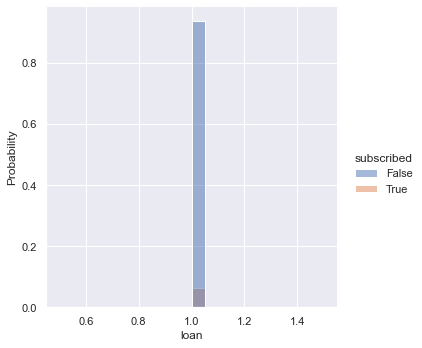

<Figure size 360x360 with 0 Axes>

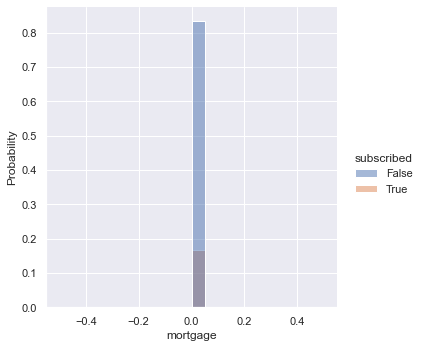

<Figure size 360x360 with 0 Axes>

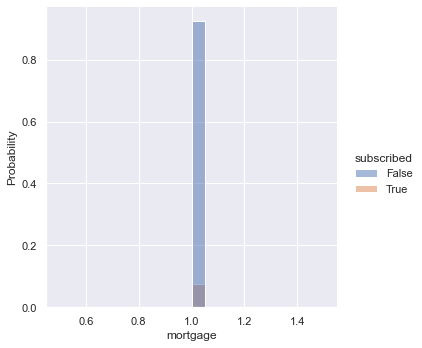

<Figure size 360x360 with 0 Axes>

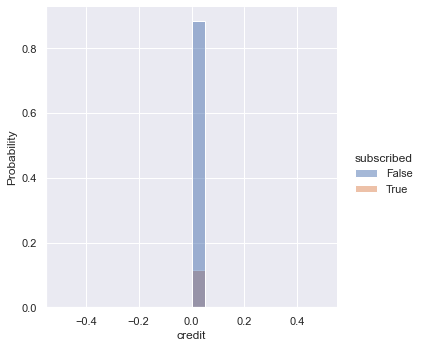

<Figure size 360x360 with 0 Axes>

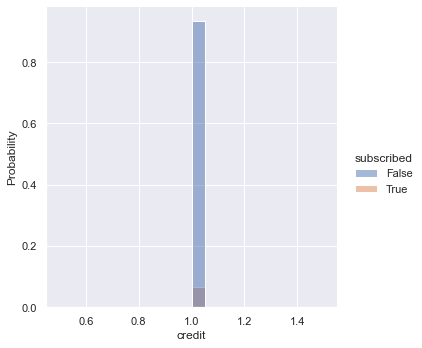

<Figure size 360x360 with 0 Axes>

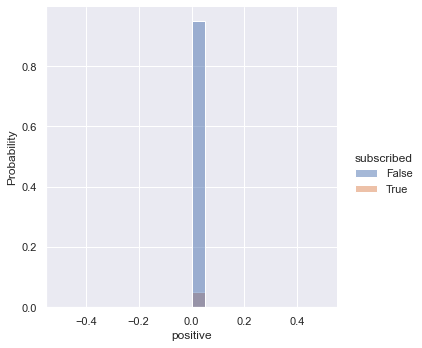

<Figure size 360x360 with 0 Axes>

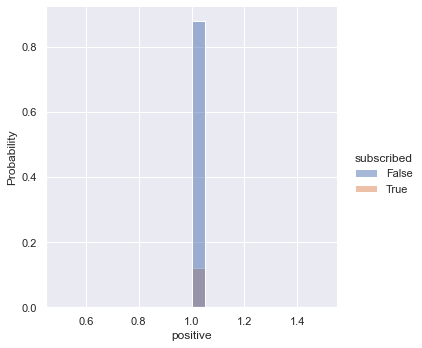

<Figure size 360x360 with 0 Axes>

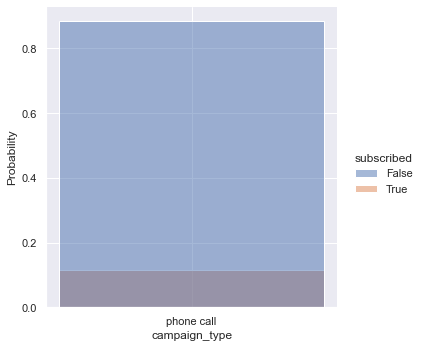

<Figure size 360x360 with 0 Axes>

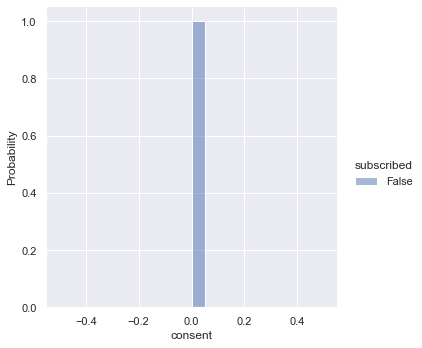

<Figure size 360x360 with 0 Axes>

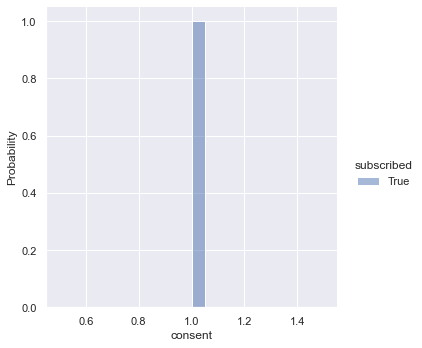

<Figure size 360x360 with 0 Axes>

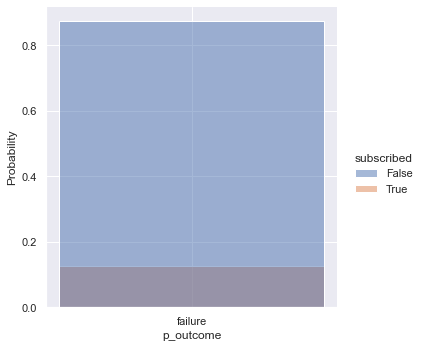

<Figure size 360x360 with 0 Axes>

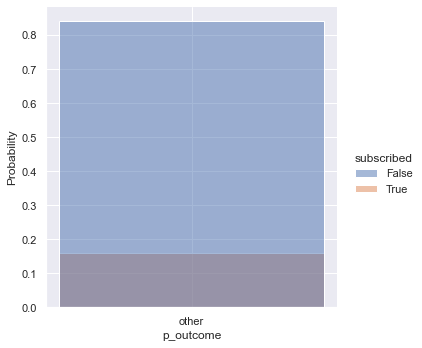

<Figure size 360x360 with 0 Axes>

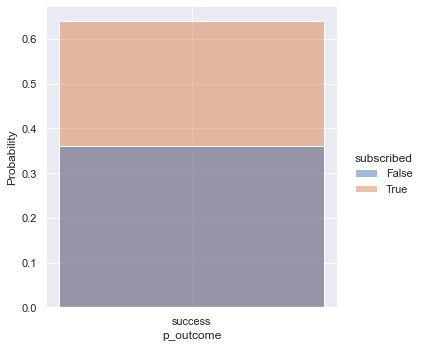

<Figure size 360x360 with 0 Axes>

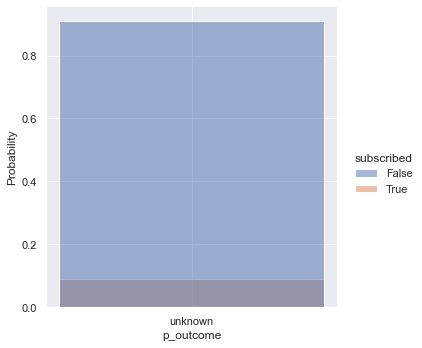

<Figure size 360x360 with 0 Axes>

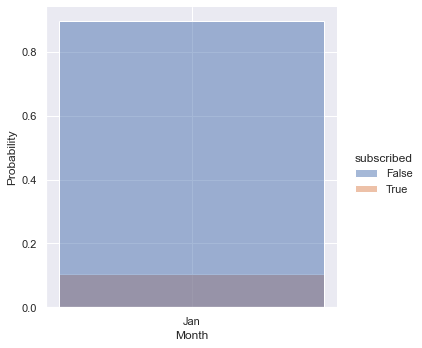

<Figure size 360x360 with 0 Axes>

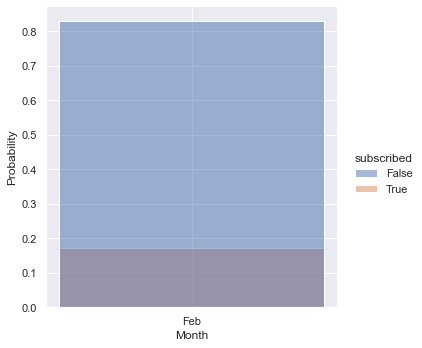

<Figure size 360x360 with 0 Axes>

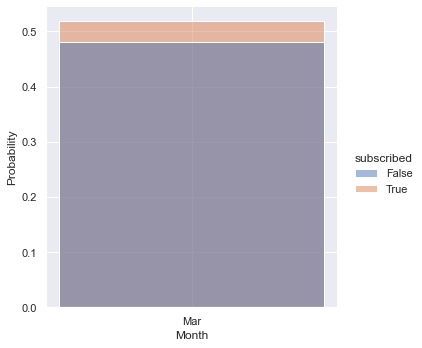

<Figure size 360x360 with 0 Axes>

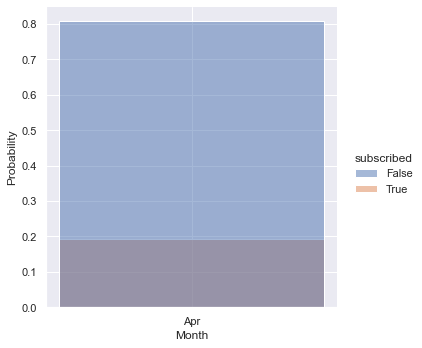

<Figure size 360x360 with 0 Axes>

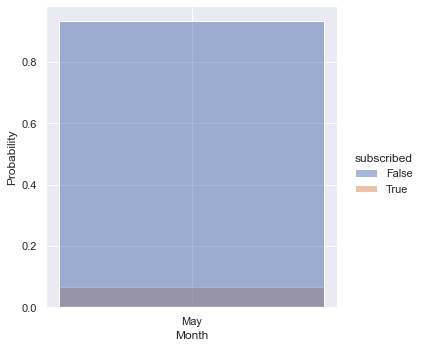

<Figure size 360x360 with 0 Axes>

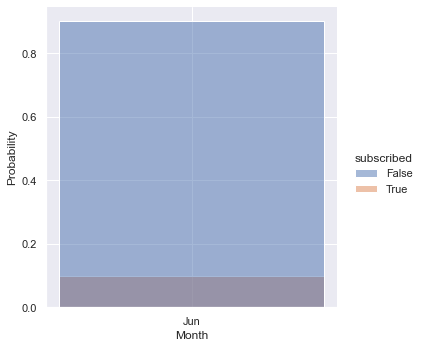

<Figure size 360x360 with 0 Axes>

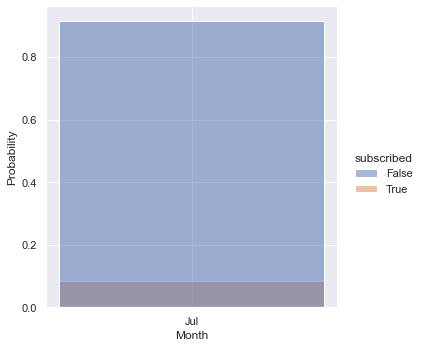

<Figure size 360x360 with 0 Axes>

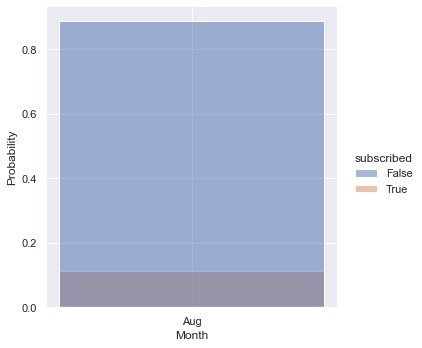

<Figure size 360x360 with 0 Axes>

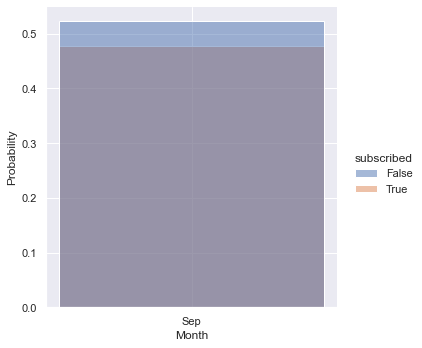

<Figure size 360x360 with 0 Axes>

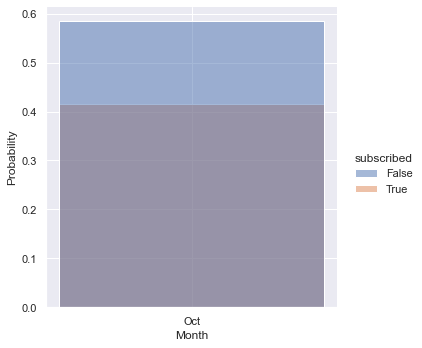

<Figure size 360x360 with 0 Axes>

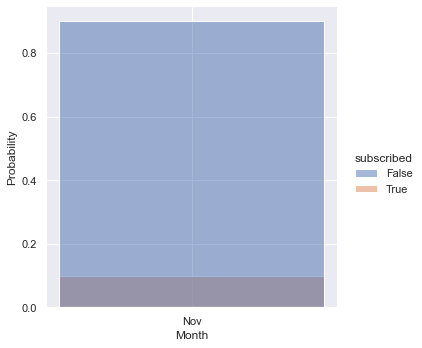

<Figure size 360x360 with 0 Axes>

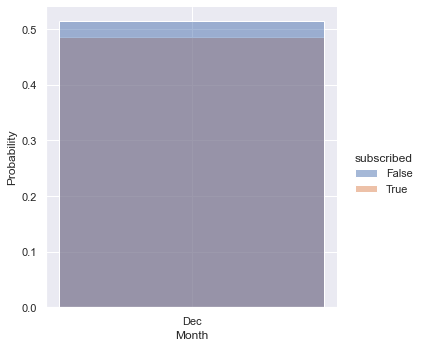

In [25]:
nom_data = nom_data.drop('l_date', axis=1)
nom_data['Month'] = df['Month'] 
for col in nom_data:
    dfg = df.groupby([col])
    for i in dfg[col].unique():
        plt.figure(figsize=(5, 5))
        sns.displot(df[df[col]==i[0]], x=col,stat= 'probability' , hue='subscribed', bins=20)

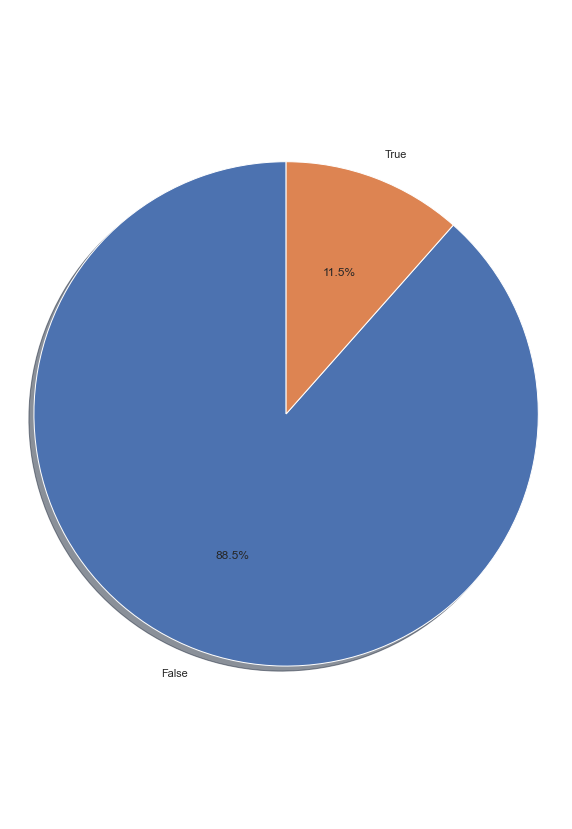

In [26]:
fig1, ax1 = plt.subplots()
ax1.pie(target['subscribed'].value_counts(), labels=target['subscribed'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Skewness

In [27]:
for col in num_data:
    print(f"{col}-\n{df[col].skew(axis = 0, skipna = True)}\n")

age-
0.6962760241958142

account_balance-
8.34806909485418

n_contact-
4.791966663755302

l_call_duration-
3.3062004571753176

n_p_contact-
48.063456853113756

p_days-
2.6168171339327766



as we can see some attributes are more skew than other, moreover age is known to be normaly distributed therefore its more symmetric and is less skewed.

# Pre-processing

# Missing values


N_child according to the previous charts is not influencing the Subscribe attribute, and therefore we might drop it as well. in addition to the fact that about 20,000 values are missing. 

In [28]:
nom_data = nom_data.drop('n_child', axis=1)

we have seen consent goes with subscribed with full correlation and they are always equals. therefore it is too much over-fitting and probably should be ignored.

In [29]:
nom_data = nom_data.drop('consent', axis=1)

as we saw device is not contributing any information about subscribing, so we decided to throw them away.

In [30]:
nom_data = nom_data.drop('device', axis=1)

campaign_type holds one same value for all our data and doesn't add any valueable information.

In [31]:
nom_data = nom_data.drop('campaign_type', axis=1)

In [32]:
nom_data

,status,education,profession,loan,mortgage,credit,positive,p_outcome,Month
id,,,,,,,,,
512491,married,doctoral,student,False,True,False,True,failure,Feb
495633,married,master,scientist,False,True,False,True,unknown,Jul
516063,divorced,bachelor,accountant,False,False,False,True,unknown,Apr
491165,married,master,engineer,True,True,False,True,unknown,Jun
494627,married,doctoral,manager,True,True,True,False,unknown,Jun
...,...,...,...,...,...,...,...,...,...
503479,married,doctoral,manager,False,False,False,True,unknown,Aug
510801,single,unknown,technician,False,False,False,True,unknown,Jan
495601,single,master,scientist,True,False,True,True,unknown,Jul


In [33]:
num_data

,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
id,,,,,,
512491,32,300,2,175,1,272
495633,45,1339,1,322,0,-1
516063,95,2064,17,188,0,-1
491165,30,530,1,45,0,-1
494627,40,-922,2,39,0,-1
...,...,...,...,...,...,...
503479,60,693,2,124,0,-1
510801,43,437,1,516,0,-1
495601,34,8,1,257,0,-1


In [34]:
new_data = data
new_data = new_data.drop(['n_child','consent', 'device','campaign_type'],axis=1)
complete= new_data.drop(['n_contact','l_date','l_call_duration','n_p_contact','p_days'], axis=1)
complete

,status,age,education,profession,account_balance,loan,mortgage,credit,positive,p_outcome
id,,,,,,,,,,
512491,married,32,doctoral,student,300,False,True,False,True,failure
495633,married,45,master,scientist,1339,False,True,False,True,unknown
516063,divorced,95,bachelor,accountant,2064,False,False,False,True,unknown
491165,married,30,master,engineer,530,True,True,False,True,unknown
494627,married,40,doctoral,manager,-922,True,True,True,False,unknown
...,...,...,...,...,...,...,...,...,...,...
503479,married,60,doctoral,manager,693,False,False,False,True,unknown
510801,single,43,unknown,technician,437,False,False,False,True,unknown
495601,single,34,master,scientist,8,True,False,True,True,unknown


education

In [35]:
edu_miss_num = complete[['age','account_balance','loan','mortgage','credit','positive']].loc[complete['education'] == 'unknown']
edu_exist_num = complete[['age','account_balance','loan','mortgage','credit','positive']].loc[complete['education'] != 'unknown']
ary = scipy.spatial.distance.cdist(edu_miss_num, edu_exist_num, metric='cityblock')

In [36]:
edu_miss_nom = complete[['status','education','profession','p_outcome']].loc[complete['education'] == 'unknown']
edu_exist_nom = complete[['status','education','profession','p_outcome']].loc[complete['education'] != 'unknown']
ary2 = scipy.spatial.distance.cdist(edu_miss_nom, edu_exist_nom, metric=lambda u,v: (1/4)*((0 if u[0]==v[0] else 1)+(0 if u[1]==v[1] else 1)+(0 if u[2]==v[2] else 1)+(0 if u[3]==v[3] else 1)))

In [37]:
ary3=(6/10)*(ary)+(4/10)*(ary2)
df['edu2'] = df['education']
for i,j in enumerate(edu_miss_nom.index):
    df.loc[j, 'edu2'] = df.loc[edu_exist_nom[ary3[i]==ary3[i].min()].index]['education'].mode()[0]

In [38]:
df['edu2'].unique()

array(['master', 'bachelor', 'doctoral'], dtype=object)

profession

In [39]:
complete['edu2']=df['edu2']

pro_miss_num = complete[['age','account_balance','loan','mortgage','credit','positive']].loc[complete['profession'] == 'unknown']
pro_exist_num = complete[['age','account_balance','loan','mortgage','credit','positive']].loc[complete['profession'] != 'unknown']
ary = scipy.spatial.distance.cdist(pro_miss_num, pro_exist_num, metric='cityblock')

pro_miss_nom = complete[['status','edu2','profession','p_outcome']].loc[complete['profession'] == 'unknown']
pro_exist_nom = complete[['status','edu2','profession','p_outcome']].loc[complete['profession'] != 'unknown']
ary2 = scipy.spatial.distance.cdist(pro_miss_nom, pro_exist_nom, metric=lambda u,v: (1/4)*((0 if u[0]==v[0] else 1)+(0 if u[1]==v[1] else 1)+(0 if u[2]==v[2] else 1)+(0 if u[3]==v[3] else 1)))
                                            
ary3=(6/10)*(ary)+(4/10)*(ary2)
df['pro2'] = df['profession']
for i,j in enumerate(pro_miss_nom.index):
    df.loc[j, 'pro2'] = df.loc[pro_exist_nom[ary3[i]==ary3[i].min()].index]['profession'].mode()[0]

In [40]:
df['pro2'].value_counts().sum()

30517

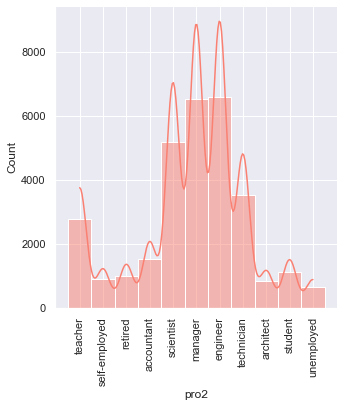

In [41]:
sns.displot(df['pro2'], bins=15, kde=True,color='salmon').set_xticklabels(rotation=90)

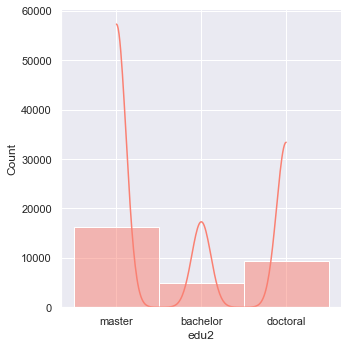

In [42]:
sns.displot(df['edu2'], bins=15, kde=True, color='salmon')

In [43]:
df['pro_cat'] = df['pro2'].astype('category').cat.codes
df['edu_cat'] = df['edu2'].astype('category').cat.codes

In [44]:
new_data['pro_cat']=df['pro_cat']
new_data['edu_cat']=df['edu_cat']

# Normalization and Outliers

z-score fitting

id 
510721   -0.176902
511200   -1.121110
511004   -0.932268
510551    0.484044
525094    3.411090
Name: age_norm, dtype: float64


30517

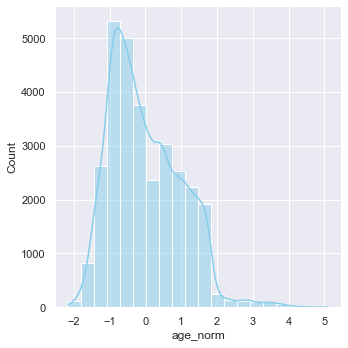

In [45]:
z_scaler = StandardScaler()
z_scaler.fit(pd.DataFrame(df['age']))
df['age_norm'] = z_scaler.transform(pd.DataFrame(df['age']))
print(df['age_norm'].head())
sns.displot(df['age_norm'], bins=20, kde=True, color='skyblue')
df['age_norm'].value_counts().sum()

30265


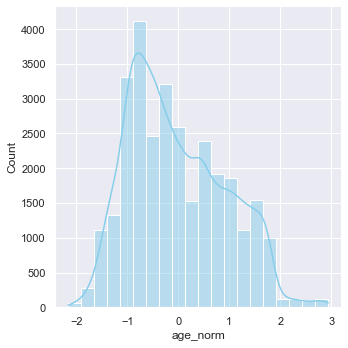

In [46]:
new_data['age_norm'] = df['age_norm']
data_mean, data_std = np.mean(df['age_norm']), np.std(df['age_norm'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
new_data = new_data.drop(df.loc[(new_data['age_norm'] > upper) | (new_data['age_norm'] < lower)].index)
sns.displot(new_data['age_norm'], bins=20, kde=True, color='skyblue')
print(new_data['age_norm'].value_counts().sum())

29763


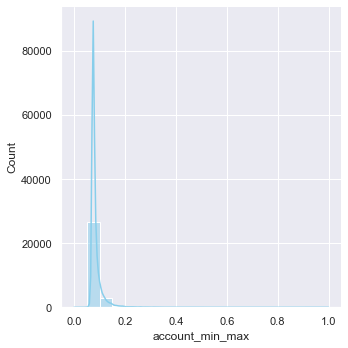

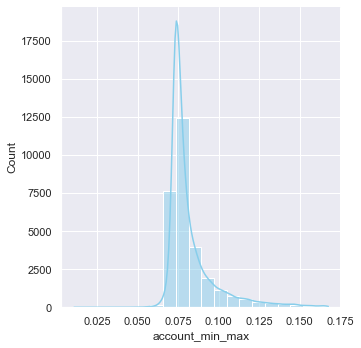

In [47]:
min_a = abs(df['account_balance'].min())
df['pos_acc'] = df['account_balance'] + min_a
scaler = MinMaxScaler()
scaler.fit(pd.DataFrame(df['pos_acc']))
df['account_min_max'] = scaler.transform(pd.DataFrame(df['pos_acc']))
sns.displot(df['account_min_max'], bins=20, kde=True, color='skyblue')
new_data['account_min_max'] = df['account_min_max']
data_mean, data_std = np.mean(df['account_min_max']), np.std(df['account_min_max'])
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
new_data = new_data.drop(new_data.loc[(new_data['account_min_max'] > upper) | (new_data['account_min_max'] < lower)].index)
sns.displot(new_data['account_min_max'], bins=20, kde=True, color='skyblue')
print(new_data['account_min_max'].value_counts().sum())


after proccessing some data we decided to remove 3 values that are very extreme

In [48]:
new_data = new_data.drop([527385,524185,523022], axis=0)

In [49]:
new_data = new_data.drop(511546, axis=0) #n_p_contact -max

normalization for the other parmaters:


In [50]:
normal_data=new_data.drop(['age','account_balance','age_norm','account_min_max'], axis=1)
normal_data=normal_data.describe()
normal_data

,n_contact,l_call_duration,n_p_contact,p_days,pro_cat,edu_cat
count,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000
mean,2.776101,232.615444,0.568567,40.137135,4.519708,1.376726
std,3.098269,232.361183,1.919264,100.548140,2.741907,0.742449
min,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000
25%,1.000000,94.000000,0.000000,-1.000000,2.000000,1.000000
50%,2.000000,163.000000,0.000000,-1.000000,3.000000,2.000000
75%,3.000000,286.000000,0.000000,-1.000000,7.000000,2.000000
max,63.000000,4428.000000,58.000000,871.000000,10.000000,2.000000


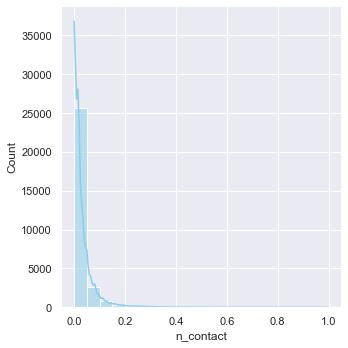

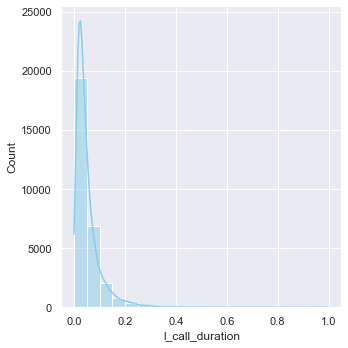

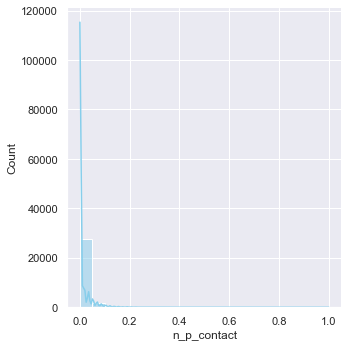

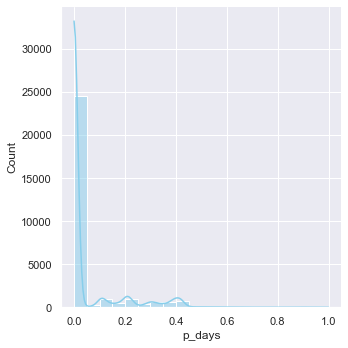

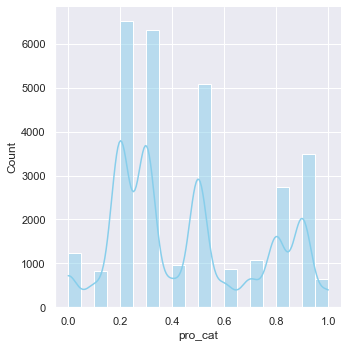

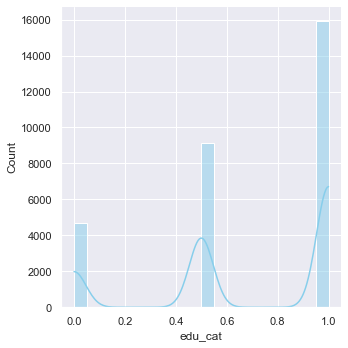

In [51]:
scaler = MinMaxScaler()
for col in normal_data:
    scaler.fit(pd.DataFrame(new_data[col]))
    new_data[col]= scaler.transform(pd.DataFrame(new_data[col]))
    #sns.displot(df[col], bins=20, kde=True, color='skyblue')
    ax = sns.displot(new_data[col], bins=20, kde=True, color='skyblue')

# Visualization

In [52]:
n_p_contact_z = new_data.loc[new_data['n_p_contact'] != 0]
print(n_p_contact_z[['n_p_contact','p_days']].describe())
new_data.describe()

       n_p_contact       p_days
count  5379.000000  5379.000000
mean      0.054234     0.260996
std       0.060405     0.133239
min       0.017241     0.002294
25%       0.017241     0.154243
50%       0.034483     0.227064
75%       0.068966     0.379587
max       1.000000     1.000000


,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days,pro_cat,edu_cat,age_norm,account_min_max
count,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000,29759.000000
mean,40.508350,970.605632,0.028647,0.052105,0.009803,0.047176,0.451971,0.688363,-0.034482,0.082493
std,10.028737,1539.297860,0.049972,0.052499,0.033091,0.115308,0.274191,0.371225,0.946922,0.015528
min,18.000000,-6152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.159739,0.010642
25%,33.000000,69.000000,0.000000,0.020786,0.000000,0.000000,0.200000,0.500000,-0.743427,0.073398
50%,39.000000,390.000000,0.016129,0.036376,0.000000,0.000000,0.300000,1.000000,-0.176902,0.076636
75%,48.000000,1202.000000,0.032258,0.064166,0.000000,0.000000,0.700000,1.000000,0.672886,0.084827
max,72.000000,9432.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.938985,0.167849


In [53]:
new_data['subscribed'] = df['subscribed']

F:\Anaconda\lib\site-packages\seaborn\distributions.py:1077: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


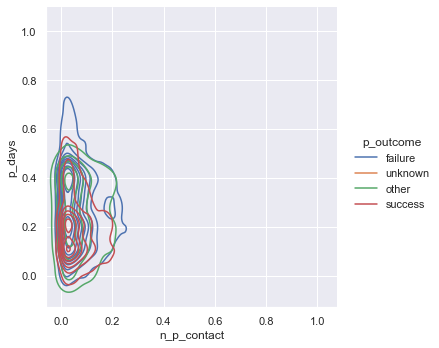

In [54]:
sns.displot(new_data, x='n_p_contact',y='p_days', hue="p_outcome", kind="kde")

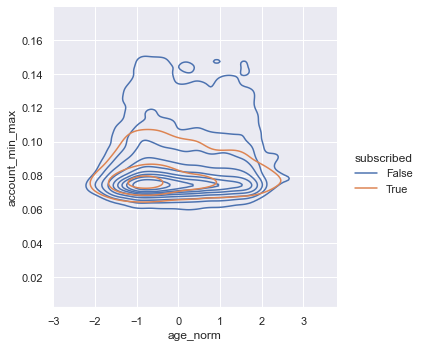

In [55]:
sns.displot(new_data, x='age_norm',y='account_min_max', hue="subscribed" ,kind='kde')

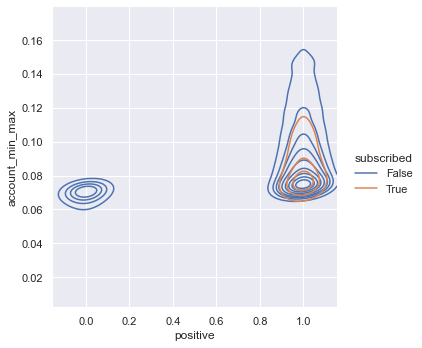

In [56]:
sns.displot(new_data, x='positive',y='account_min_max', hue="subscribed" ,kind='kde')

F:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


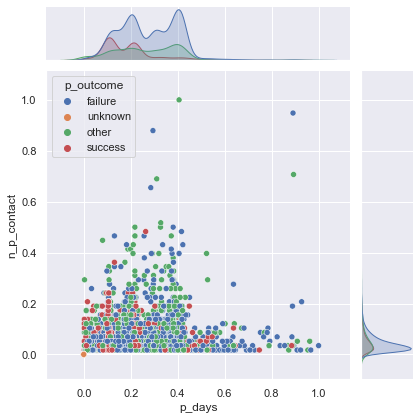

In [57]:
sns.jointplot(data=new_data, x='p_days',y="n_p_contact", hue="p_outcome")

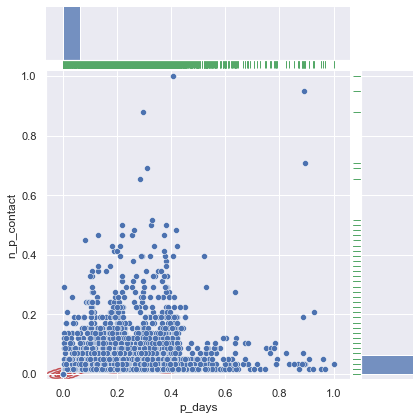

In [58]:
g = sns.jointplot(data=new_data, x='p_days',y="n_p_contact")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="g", height=-.15, clip_on=False)

<AxesSubplot:>

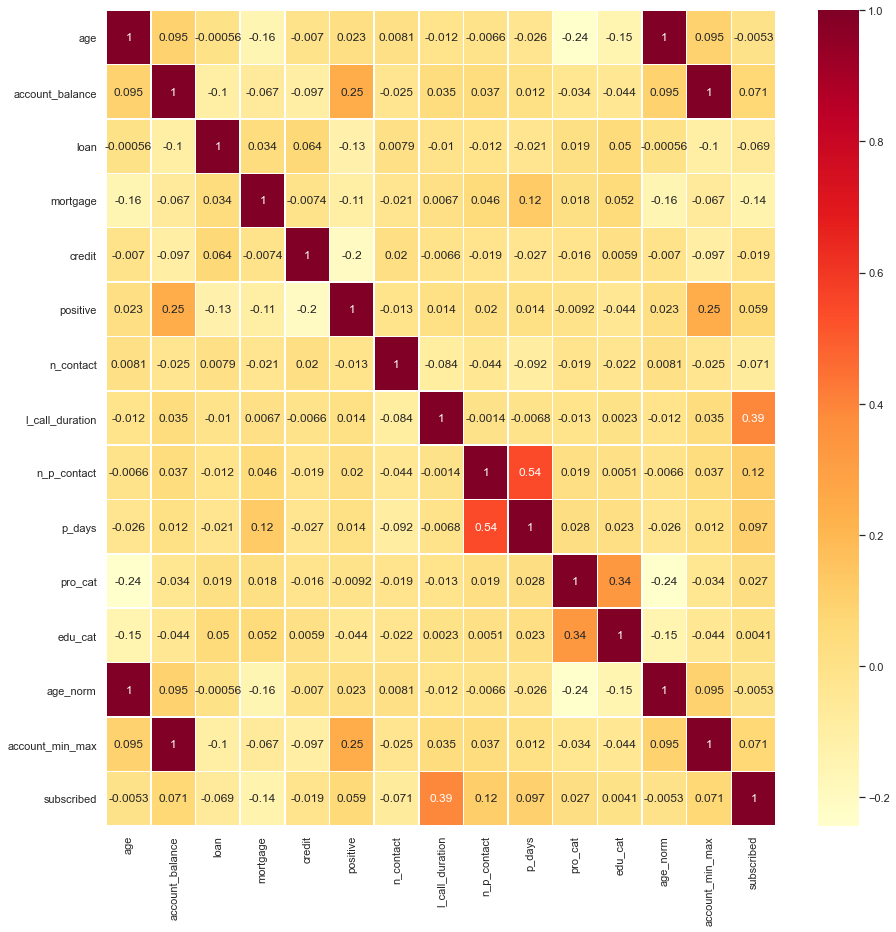

In [59]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(new_data.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlOrRd")

In [60]:
new_data

,status,age,education,profession,account_balance,loan,mortgage,credit,positive,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,pro_cat,edu_cat,age_norm,account_min_max,subscribed
id,,,,,,,,,,,,,,,,,,,,
512491,married,32,doctoral,student,300,False,True,False,True,0.016129,4-Feb,0.039087,failure,0.017241,0.313073,0.7,0.5,-0.837848,0.075728,False
495633,married,45,master,scientist,1339,False,True,False,True,0.000000,8-Jul,0.072300,unknown,0.000000,0.000000,0.5,1.0,0.389623,0.086209,False
491165,married,30,master,engineer,530,True,True,False,True,0.000000,4-Jun,0.009715,unknown,0.000000,0.000000,0.2,1.0,-1.026689,0.078048,False
494627,married,40,doctoral,manager,-922,True,True,True,False,0.016129,23-Jun,0.008360,unknown,0.000000,0.000000,0.3,0.5,-0.082481,0.063401,False
489162,married,39,unknown,engineer,584,True,True,False,True,0.016129,28-May,0.016945,unknown,0.000000,0.000000,0.2,1.0,-0.176902,0.078593,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522814,married,70,bachelor,accountant,7013,False,False,False,True,0.000000,3-Jul,0.045188,unknown,0.000000,0.000000,0.0,0.0,2.750144,0.143447,False
503479,married,60,doctoral,manager,693,False,False,False,True,0.016129,14-Aug,0.027564,unknown,0.000000,0.000000,0.3,0.5,1.805936,0.079693,False
510801,single,43,unknown,technician,437,False,False,False,True,0.000000,29-Jan,0.116132,unknown,0.000000,0.000000,0.9,1.0,0.200782,0.077110,False


In [61]:
df1=new_data.drop(['age','account_balance'], axis=1)
df1=df1[df1.describe().columns]
print(df1)
pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df1)
df2 = pca.transform(df1)
df2 = pd.DataFrame(pca.transform(df1))
df2.head()

        n_contact  l_call_duration  n_p_contact    p_days  pro_cat  edu_cat  \
id                                                                            
512491   0.016129         0.039087     0.017241  0.313073      0.7      0.5   
495633   0.000000         0.072300     0.000000  0.000000      0.5      1.0   
491165   0.000000         0.009715     0.000000  0.000000      0.2      1.0   
494627   0.016129         0.008360     0.000000  0.000000      0.3      0.5   
489162   0.016129         0.016945     0.000000  0.000000      0.2      1.0   
...           ...              ...          ...       ...      ...      ...   
522814   0.000000         0.045188     0.000000  0.000000      0.0      0.0   
503479   0.016129         0.027564     0.000000  0.000000      0.3      0.5   
510801   0.000000         0.116132     0.000000  0.000000      0.9      1.0   
495601   0.000000         0.057614     0.000000  0.000000      0.5      1.0   
501424   0.000000         0.312246     0.000000  0.0

,0,1,2,3,4,5
0,-0.806165,0.157487,0.263757,0.260307,-0.010472,-0.005974
1,0.396356,-0.345748,-0.051106,-0.047599,0.032325,-0.016701
2,-0.988469,-0.103363,-0.396317,-0.047685,-0.024528,-0.048361
3,-0.022476,0.234687,-0.073717,-0.045207,-0.031701,-0.034848
4,-0.143396,-0.183109,-0.356080,-0.046518,-0.025247,-0.030403


In [62]:
pca.explained_variance_ratio_

array([0.80145085, 0.12939609, 0.05157037, 0.01208017, 0.0025465 ,
       0.00207998])

<AxesSubplot:>

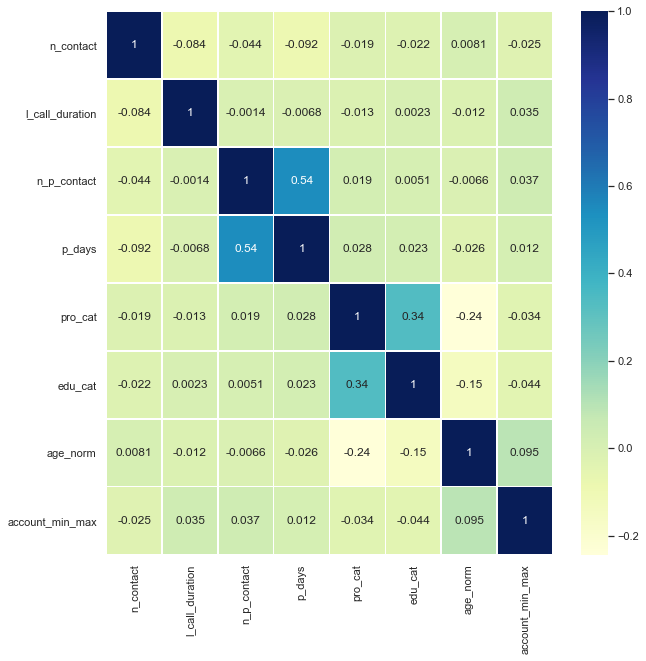

In [63]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

<AxesSubplot:>

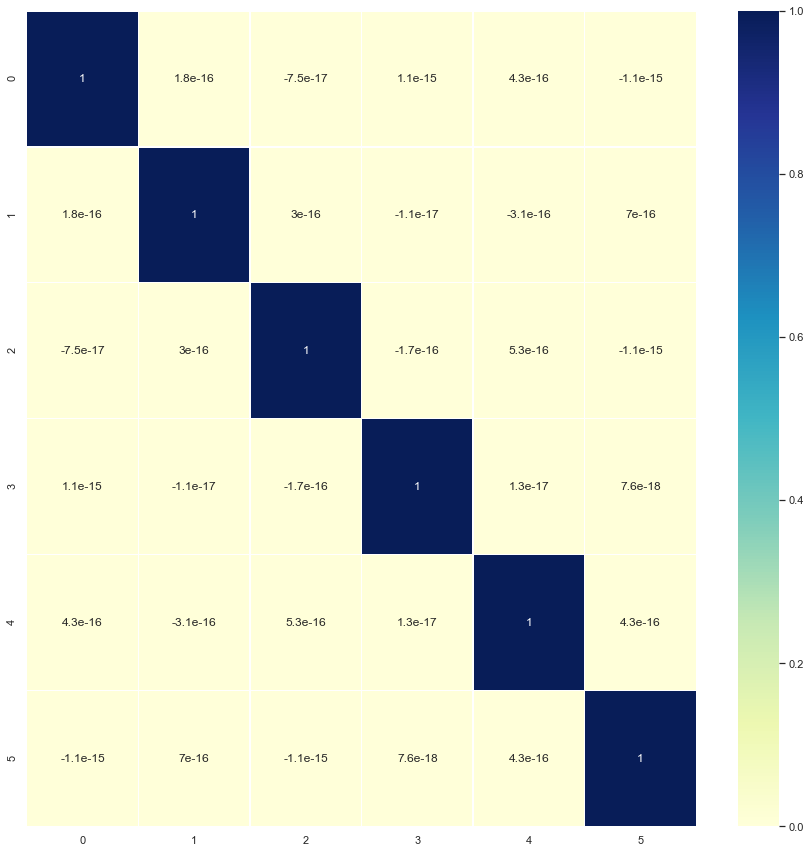

In [64]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(df2.corr(), annot=True, linewidths=.5, ax=ax, cmap="YlGnBu")

# Conclusion

In [65]:
df1.to_csv('Titanic_final.csv')